In [3]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, \
                      RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('/content/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### DESCRIPTION OF VARIABLES
- PassengerId - A unique ID for each passenger.
- Survived - Whether the passenger survived or not. (0 = No, 1 = Yes)
- Pclass - The class of the ticket the passenger purchased. (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
- Name - The name of the passenger.
- Sex - Whether the passenger was Male or Female.
- Age - Age of the passenger in years.
- Sibsp - The number of siblings or spouses the passenger had aboard the Titanic.
- Parch - The number of parents or children the passenger had aboard the Titanic.
- Ticket - The ticket number of the passenger.
- Fare - The amount of money the passenger paid for the ticket.
- Cabin - The cabin number of the passenger according to the each deck.
- Embarked - The port from where the passenger were boarded the Titanic. (C = Cherbourg, Q = Queenstown, S = Southampton)

### DATA EXPLORATION

In [5]:
df.shape

(891, 12)

There are 891 observations and 12 features

In [6]:
cols = df.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the categorical and numerical columns in the dataset

In [9]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

As we can see from the results above, we have five categorical features (name, sex, ticket, cabin and embarked) whereas the others are numeric columns. Technically, the survived column should by a categorical column.

Now, let's explore the categorical columns

In [10]:
print(f"{'feature': <20} \t {'no. of values': <20}")
print('-'*40)
for col in cat_cols:
    print(f"{col: <20} \t {df[col].nunique(): <20}")

feature              	 no. of values       
----------------------------------------
Name                 	 891                 
Sex                  	 2                   
Ticket               	 681                 
Cabin                	 147                 
Embarked             	 3                   


In the _Name_ feature, we have 891 distinct values which corresponds to the names of the passengers. We should not include this feature in our model since including it might lead to overfitting of the model. The are only 2 distinct values in the _Sex_ feature. These are males and females.

Let's check for the number of missing values in each column.


In [11]:
print(f"{'Feature': <20} \t {'no. missing values': <20} \t {'Percantage of missing values': <20}")
print('-'*77)
for col in cols:
    print(f"{col: <20} \t {df[col].isna().sum(): <20} \t {np.round(df[col].isna().sum()/df.shape[0],2)*100}%")

Feature              	 no. missing values   	 Percantage of missing values
-----------------------------------------------------------------------------
PassengerId          	 0                    	 0.0%
Survived             	 0                    	 0.0%
Pclass               	 0                    	 0.0%
Name                 	 0                    	 0.0%
Sex                  	 0                    	 0.0%
Age                  	 177                  	 20.0%
SibSp                	 0                    	 0.0%
Parch                	 0                    	 0.0%
Ticket               	 0                    	 0.0%
Fare                 	 0                    	 0.0%
Cabin                	 687                  	 77.0%
Embarked             	 2                    	 0.0%


As we can see, the _Cabin_ feature as about 77% of it's data missing hence this column contains less info

Let's check the number of passengers who survived and those who did not.

Checking the number of females who survived and those who didn't

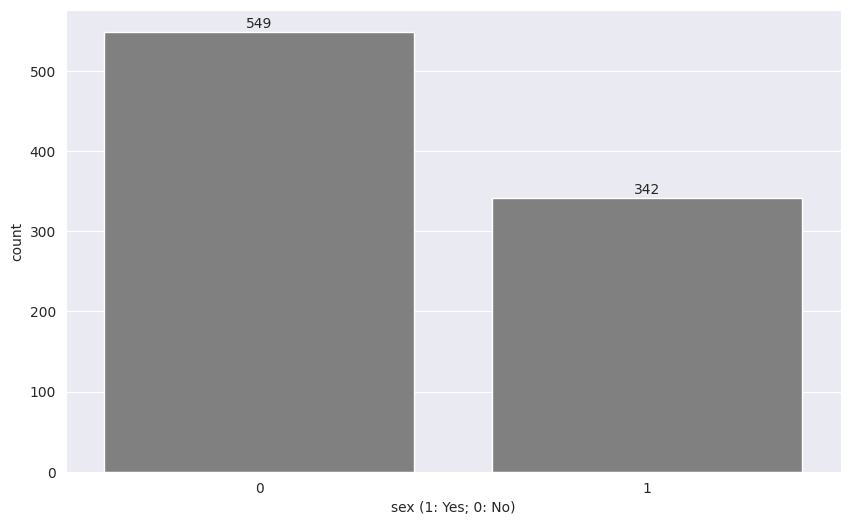

In [12]:
x = np.arange(len(df['Survived'].unique()))
y = df['Survived'].value_counts()



def plot_survived(x, y, title='', ylab='count', xlab='sex (1: Yes; 0: No)', c='gray', comp_sex=False):
    """
    Returns a plot of the number of individuals who survived and those who did not

        Parameters:
            x (array | list | tuple): categories
            y (array | list | tuple): number of observations for each category
            title (str): title of the plot
            ylab (str): label for y-axis
            xlab (str): label for x-axis
            c (str): color of the plot

        Returns:
            None
    """

    plt.figure(figsize=(10,6))
    sns.barplot(x=x, y=y, color=c)
    for i in range(len(x)):
        plt.text(x[i], y[i]+0.01*np.max(y), str(y[i]), ha='center')
    plt.xticks(ticks=x, labels=df['Survived'].unique())
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

plot_survived(x,y)

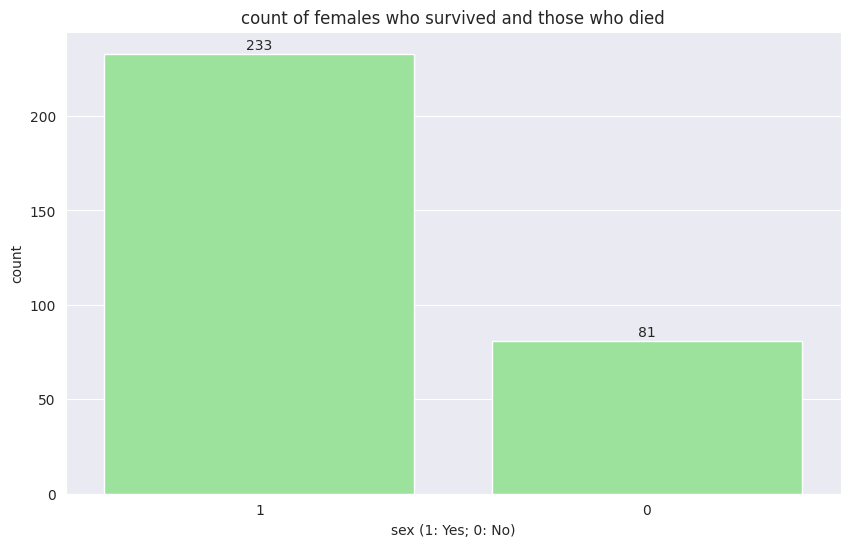

In [13]:
females_df = df[df['Sex'] == 'female']
males_df = df[df['Sex'] == 'male']

plot_survived(females_df['Survived'].unique(), females_df['Survived'].value_counts()[::-1], \
              title='count of females who survived and those who died', c='lightgreen')

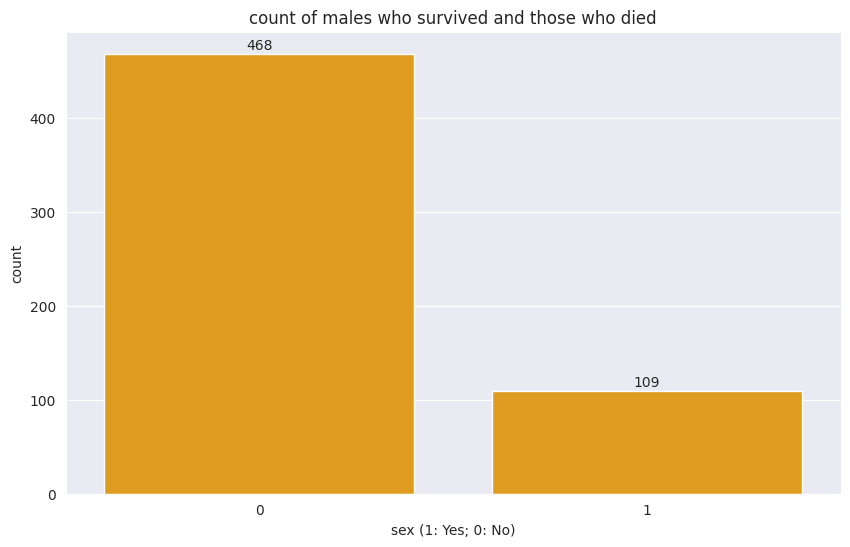

In [14]:
plot_survived(males_df['Survived'].unique(), males_df['Survived'].value_counts(), \
              title='count of males who survived and those who died', c='orange')

Checking the number of individuals who survived based on the _Embarked_ feature

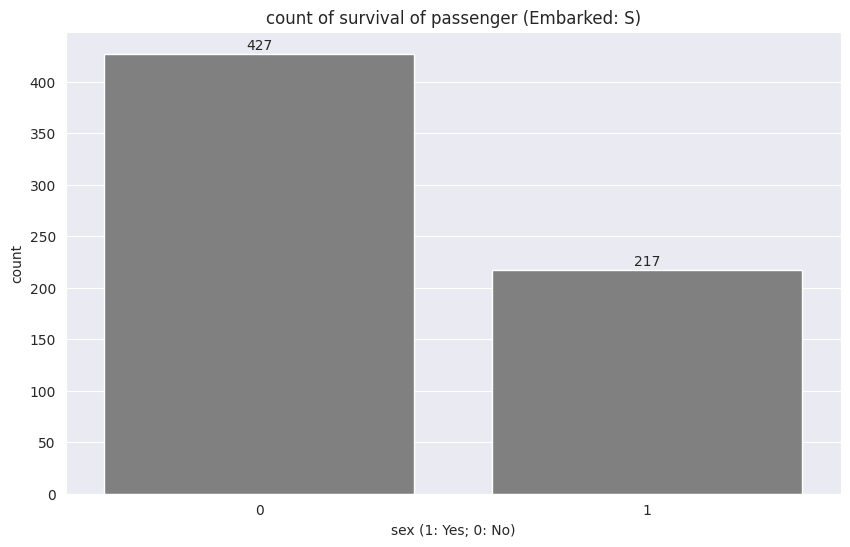

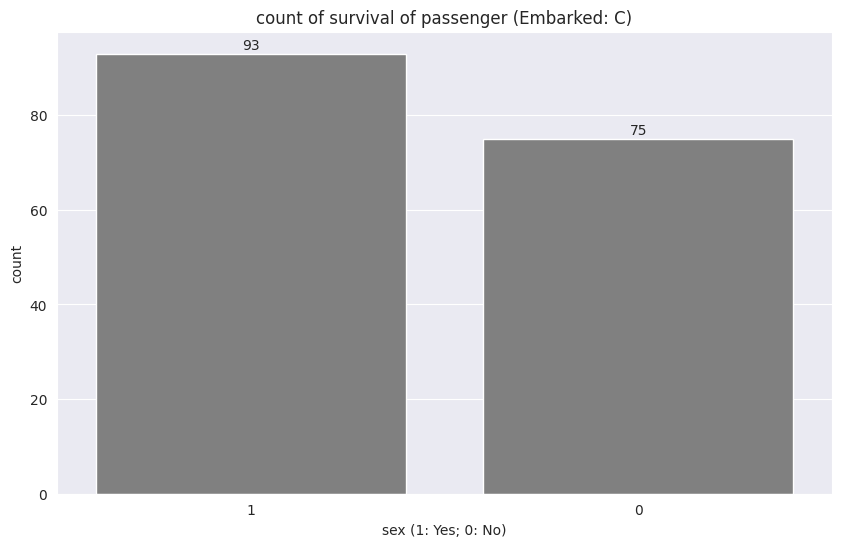

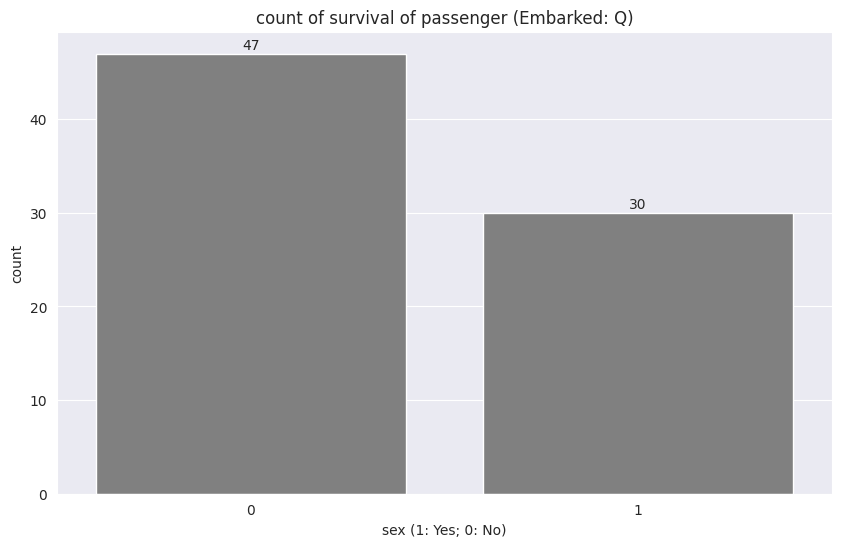

In [15]:
for port in df['Embarked'].unique()[:-1]:
    xx = df[df['Embarked'] == port]['Survived'].unique()
    yy = df[df['Embarked'] == port]['Survived'].value_counts()
    if yy[1] > yy[0]:
      yy = yy[::-1]
    plot_survived(xx, yy, title=f'count of survival of passenger (Embarked: {port})')

(array([-0.1,  0.9]), Survived
1    140
0     63
Name: count, dtype: int64)
(array([-0.1,  0.9]), Survived
1    64
0     9
Name: count, dtype: int64)
(array([-0.1,  0.9]), Survived
1    27
0     9
Name: count, dtype: int64)


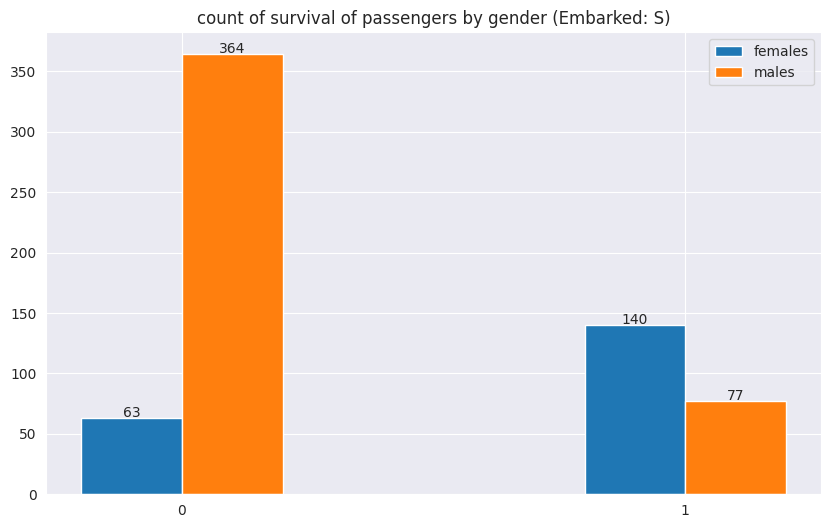

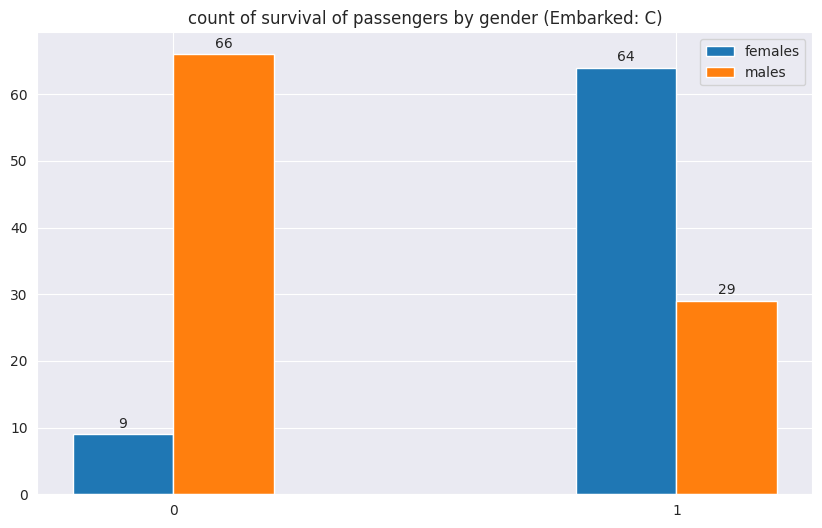

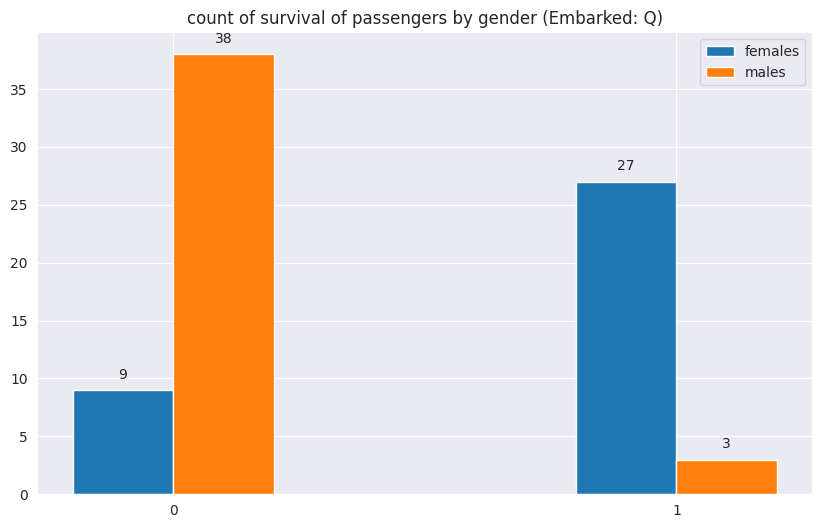

In [16]:
kk = df[df['Embarked'] == 'C']
kk_males = kk[kk['Sex'] == 'male']
kk_females = kk[kk['Sex'] == 'female']

def add_labels(x,y):
    if (y[1] > y[0]):
            print((x, y))
            y = y[::-1]
    for i in range(len(x)):
        plt.text(x[i], y[i]+1, str(y[i]), ha='center')

def plot_subs_survived(embarked_df_females, embarked_df_males, width=0.2, offset=0.1, title=''):
    plt.figure(figsize=(10,6))
    width, offset = 0.2, 0.1
    x = np.arange(len(embarked_df_females['Survived'].unique()))
    plt.bar(x=x-offset, height=embarked_df_females['Survived'].value_counts().values[::-1], width=width, label='females')
    add_labels(x-offset, embarked_df_females['Survived'].value_counts())
    plt.bar(x=x+offset, height=embarked_df_males['Survived'].value_counts(), width=width, label='males')
    add_labels(x+offset, embarked_df_males['Survived'].value_counts())
    plt.xticks(ticks=x, labels=x)
    plt.title(title)
    plt.legend()


for ele in df['Embarked'].unique()[:-1]:
    embarked_df = df[df['Embarked'] == ele]
    embarked_df_males = embarked_df[embarked_df['Sex'] == 'male']
    embarked_df_females = embarked_df[embarked_df['Sex'] == 'female']

    plot_subs_survived(embarked_df_females, embarked_df_males, title=f"count of survival of passengers by gender (Embarked: {ele})")

### Exploring the numerical features

In [17]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
print(f"{'feature': <20} \t {'no. of values': <20}")
print('-'*40)
for col in num_cols[2:]:
    print(f"{col: <20} \t {df[col].nunique(): <20}")


feature              	 no. of values       
----------------------------------------
Pclass               	 3                   
Age                  	 88                  
SibSp                	 7                   
Parch                	 7                   
Fare                 	 248                 


As we can see, the _Pclass_ feature which denotes the class ticket the passenger bought has only 3 distinct values. By its definition, it should be considered a categorical variable, not a numeric one. Although the _SibSp_ and the _Parch_ features have relatively few distinct values, they actually represent numbers hence we treat them as numerical features.

Let's look at the distribution of the _Pclass_ feature

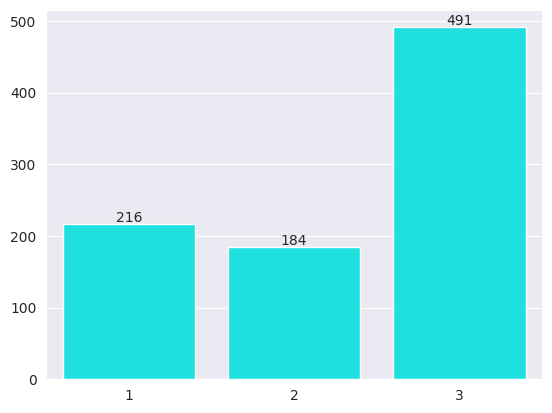

In [19]:
x = df['Pclass'].unique()
y = df['Pclass'].value_counts().values
sns.barplot(x=x, y=y, color='cyan')
for i in range(len(x)):
    plt.text(x[i]-1, y[i]+4, str(y[i]), ha='center')

Let's explicitly cast the _Pclass_ feature as a categorical variable.

In [20]:
df['Pclass'] = df['Pclass'].astype('object')

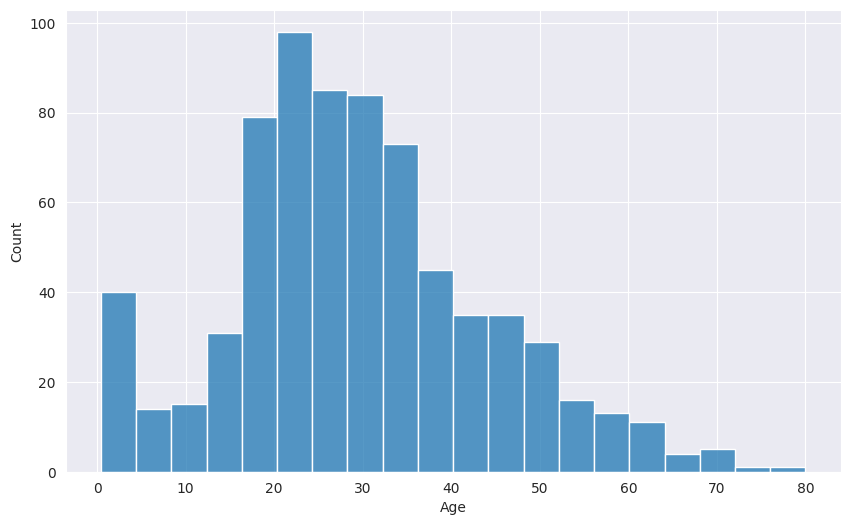

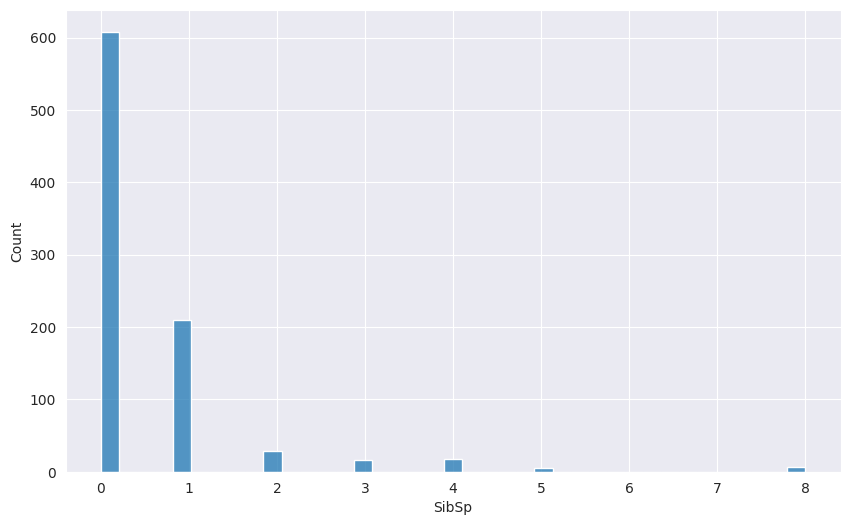

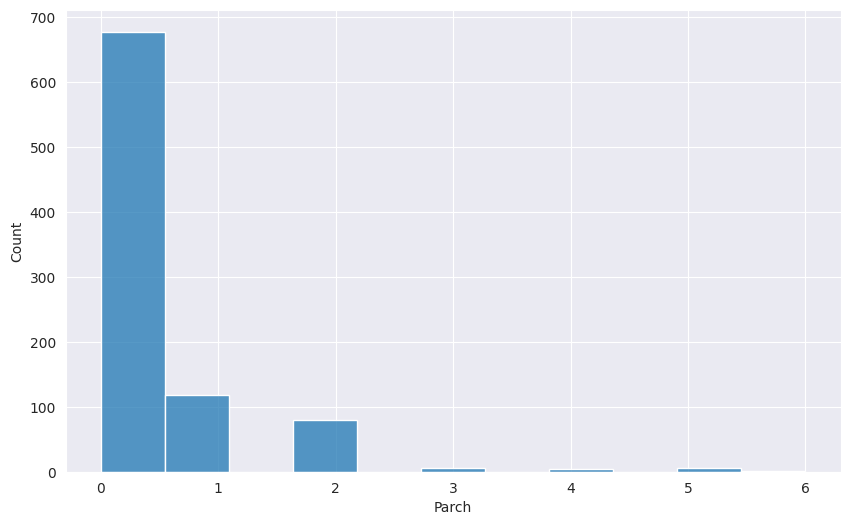

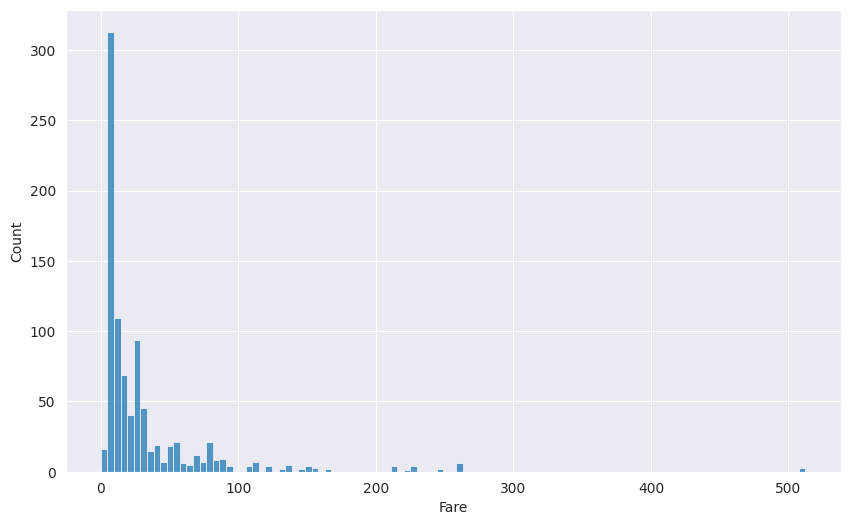

In [21]:
for col in num_cols[3:]:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col])

Let's check the correlation of the numeric features

<Axes: >

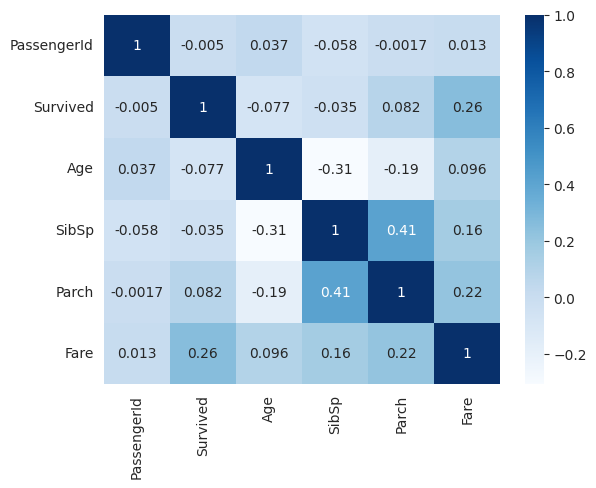

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

### DATA PREPROCESSING

First, lets drop the _Name_ and _Passenger_ features since these features are of little importance and may cause the model to overfit. Also, we drop the _Cabin_ feature since it has most of its values missing (around 77% of its data points are missing).

In [23]:
df.drop(labels=['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Selecting the target and input features

In [24]:
target = df['Survived']
input_feats = df.drop(labels=['Survived'], axis=1)

In [25]:
input_feats

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,S
887,1,female,19.0,0,0,112053,30.0000,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,male,26.0,0,0,111369,30.0000,C


### Imputing the missing values

Now, we have only two features with missing values. Since the _Age_ feature is numeric, we will impute its missing values using the median and use the mode to input the that of the _Embarked_ feature (as it is categorical).

In [26]:
cat_cols_input = input_feats.select_dtypes(include='object').columns.tolist()
num_cols_input =  input_feats.select_dtypes(include=np.number).columns.tolist()

In [27]:
imputer = SimpleImputer(strategy='median').fit(input_feats[num_cols_input], target)
input_feats[num_cols_input] = imputer.transform(input_feats[num_cols_input])

Now, let's imput the categorical features

In [28]:
most_freq_embarked = input_feats['Embarked'].mode()[0]
input_feats['Embarked'] = input_feats['Embarked'].fillna(most_freq_embarked)
input_feats.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### SPLITTING THE DATASET INTO TRAINING AND TEST SETS

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input_feats, target, test_size=0.2, random_state=0)

In [30]:
x_train.shape

(712, 8)

### Encoding the categorical variables

In [31]:
# dummy encoding the sex and embarked features
encoder0 = OneHotEncoder().fit(x_train.loc[:, ['Sex', 'Embarked']])
encoded_cols_0 = list(encoder0.get_feature_names_out(['Sex', 'Embarked']))
x_train[encoded_cols_0] = encoder0.transform(x_train.loc[:, ['Sex', 'Embarked']]).toarray()
encoded_x_train = x_train.drop(labels=['Sex', 'Embarked'], axis=1)

# label encoding the Ticket features
encoder1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit(np.array(x_train['Ticket']).reshape(-1,1))
encoded_x_train['Ticket'] = encoder1.transform(np.array(x_train['Ticket']).reshape(-1,1))
encoded_x_train

# encoding the Pclass feature
encoded_x_train['Pclass'] = encoded_x_train['Pclass'].astype(int)

In [32]:
encoded_x_train['Pclass'].dtype

dtype('int64')

In [33]:
encoded_x_train

,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
140,3,28.0,0.0,2.0,171.0,15.2458,1.0,0.0,1.0,0.0,0.0
439,2,31.0,0.0,0.0,451.0,10.5000,0.0,1.0,0.0,0.0,1.0
817,2,31.0,1.0,1.0,515.0,37.0042,0.0,1.0,1.0,0.0,0.0
378,3,20.0,0.0,0.0,156.0,4.0125,0.0,1.0,1.0,0.0,0.0
491,3,21.0,0.0,0.0,537.0,7.2500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
835,1,39.0,1.0,1.0,507.0,83.1583,1.0,0.0,1.0,0.0,0.0
192,3,19.0,1.0,0.0,338.0,7.8542,1.0,0.0,0.0,0.0,1.0
629,3,28.0,0.0,0.0,240.0,7.7333,0.0,1.0,0.0,1.0,0.0
559,3,36.0,1.0,0.0,253.0,17.4000,1.0,0.0,0.0,0.0,1.0


As we can see, we have successfully imputed the missing values and encoded the categorical values. The next task for us is to standardize the numerical features.

### STANDARDIZING THE NUMERIC FEATURES


Standardizing
$$\tilde{x} = \frac{x - \mu}{\sigma}$$


Normalizing
$$x = \frac{x - \min (x)}{\max(x) - \min(x)}$$

In [34]:
scaler = StandardScaler().fit(encoded_x_train[num_cols_input])
encoded_x_train[num_cols_input] = scaler.transform(encoded_x_train[num_cols_input])

In [35]:
encoded_x_train

,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
140,3,-0.106848,-0.464452,1.959264,171.0,-0.331679,1.0,0.0,1.0,0.0,0.0
439,2,0.122181,-0.464452,-0.477410,451.0,-0.426405,0.0,1.0,0.0,0.0,1.0
817,2,0.122181,0.412710,0.740927,515.0,0.102620,0.0,1.0,1.0,0.0,0.0
378,3,-0.717594,-0.464452,-0.477410,156.0,-0.555896,0.0,1.0,1.0,0.0,0.0
491,3,-0.641251,-0.464452,-0.477410,537.0,-0.491276,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
835,1,0.732927,0.412710,0.740927,507.0,1.023857,1.0,0.0,1.0,0.0,0.0
192,3,-0.793937,0.412710,-0.477410,338.0,-0.479216,1.0,0.0,0.0,0.0,1.0
629,3,-0.106848,-0.464452,-0.477410,240.0,-0.481629,0.0,1.0,0.0,1.0,0.0
559,3,0.503897,0.412710,-0.477410,253.0,-0.288681,1.0,0.0,0.0,0.0,1.0


### MODEL BUILDING

In [36]:
model = LogisticRegression(random_state=0)
model.fit(encoded_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [37]:
pd.DataFrame(
    {
        'features': encoded_x_train.columns,
        'coefficients': (model.intercept_ + model.coef_)[0]
    }
)


,features,coefficients
0,Pclass,0.391243
1,Age,0.751625
2,SibSp,0.848871
3,Parch,1.244731
4,Ticket,1.276211
5,Fare,1.412824
6,Sex_female,3.153725
7,Sex_male,0.549603
8,Embarked_C,1.815484
9,Embarked_Q,1.719127


Let's check the prediction accuracy of the model on the test set

In [38]:
train_preds = model.predict(encoded_x_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Accuracy score of model on the training set: {train_accuracy*100:.2f}%")

Accuracy score of model on the training set: 79.92%


The model has an accuracy score of 80% when used to predict the training set. Now, let's check the performance of the model on the test set. Before we do that, we must preprocess the test set using the same proceeding used for preprocessing the training set. To do this, we define a function to automate the preprocessing step.

In [39]:
def process_test(test_set):
    # encoding the categorical features
    test_set[encoded_cols_0] = encoder0.transform(test_set.loc[:, ['Sex', 'Embarked']]).toarray()
    encoded_x_test = test_set.drop(labels=['Sex', 'Embarked'], axis=1)

    encoded_x_test['Ticket'] = encoder1.transform(np.array(test_set['Ticket']).reshape(-1,1))

    encoded_x_test['Pclass'] = encoded_x_test['Pclass'].astype(int)

    # standardizing the numerical features
    encoded_x_test[num_cols_input] = scaler.transform(encoded_x_test[num_cols_input])

    return encoded_x_test

In [40]:
processed_test_set = process_test(x_test)

Checking the accuracy of the model on the test set

In [41]:
test_preds = model.predict(processed_test_set)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Accuracy score of model on the test set: {test_accuracy*100:.2f}%")

Accuracy score of model on the test set: 79.89%


As we can see, the difference between the accuracy of model on the training and test sets is very small

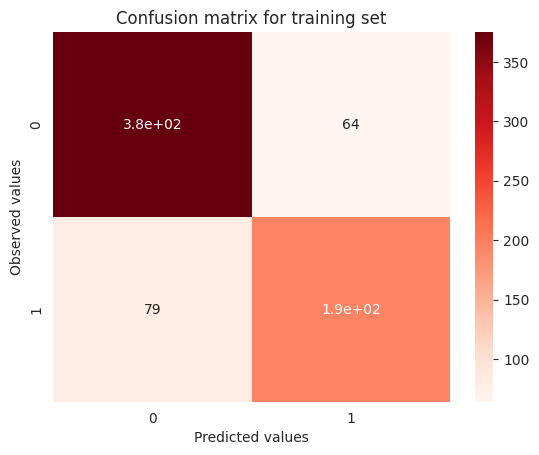

In [42]:
def plot_confusion_matrix(y_act, y_pred, title='', cmap='Reds'):
    cm = confusion_matrix(y_act, y_pred)
    sns.heatmap(cm, annot=True, cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted values')
    plt.ylabel('Observed values')

plot_confusion_matrix(y_train, train_preds, title='Confusion matrix for training set')

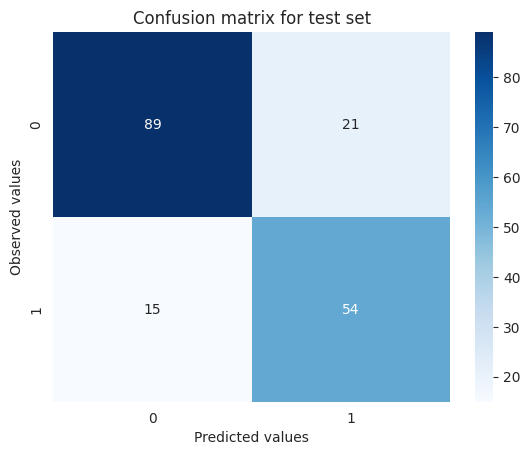

In [43]:
plot_confusion_matrix(y_test, test_preds, title='Confusion matrix for test set', cmap='Blues')

The precision measures the number of true-positives to all positive predictions. Mathematically, it is given as
$$\text{Precision} = \frac{TP}{TP + FP}$$

In [44]:
test_precision = precision_score(y_test, test_preds)
print(f"Precision score of model on the test set: {test_precision*100:.2f}%")

Precision score of model on the test set: 72.00%


The recall (also known as the sensitivity or true positive rate (TPR)) is the ratio of all true-positives to all positive samples in the dataset.

$$\text{Recall} = \frac{TP}{TP + FN}$$

In [45]:
test_recall = recall_score(y_test, test_preds)
print(f"Recall score of model on the test set: {test_recall*100:.2f}%")

Recall score of model on the test set: 78.26%


The f1-score is the harmonic mean of the precision and the recall.

$$\text{f1-Score} = 2 \frac{Precision \cdot Recall}{Precision + Recall}$$

In [46]:
test_f1 = f1_score(y_test, test_preds)
print(f"F1 score of model on the test set: {test_f1*100:.2f}%")

F1 score of model on the test set: 75.00%


In [47]:
test_roc_auc = roc_auc_score(y_test, test_preds)
print(f"ROC-AUC score of model on the test set: {test_roc_auc*100:.2f}%")

ROC-AUC score of model on the test set: 79.58%


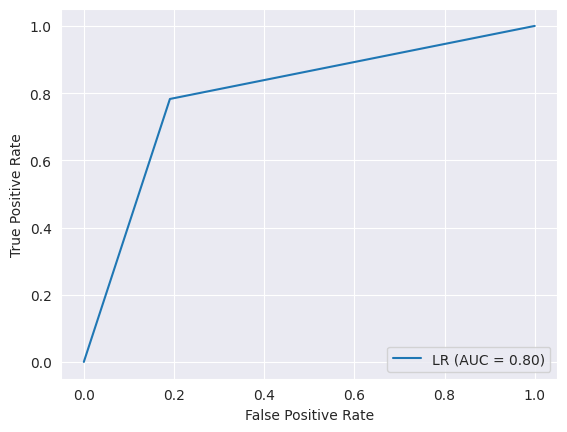

In [48]:
fpr, tpr, threshold = roc_curve(y_test, test_preds)
roc_score = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_score, estimator_name='LR')
display.plot()